C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4284\520587369.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  locations_with_hospitals_counts['geometry'] = locations_with_hospitals_counts['geometry'].centroid


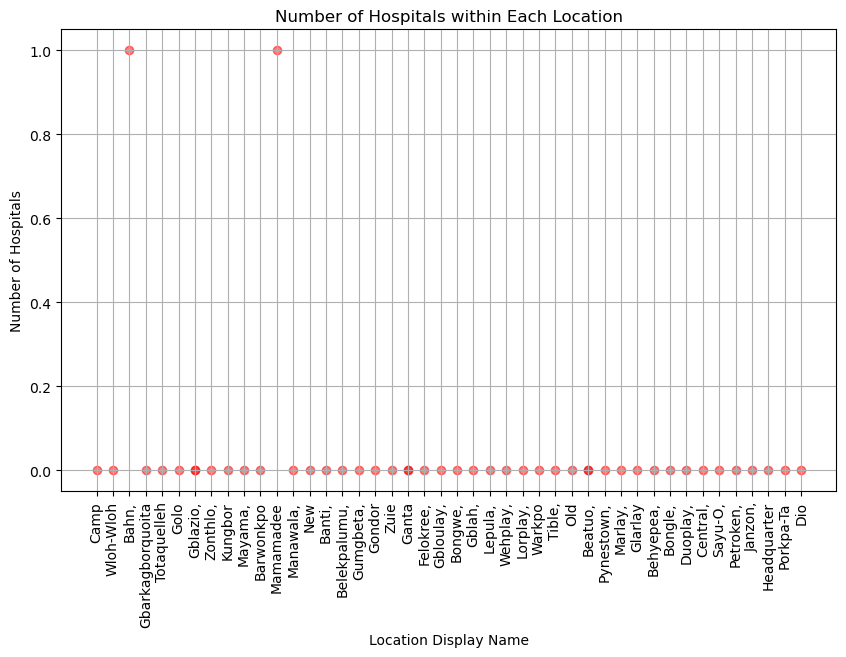

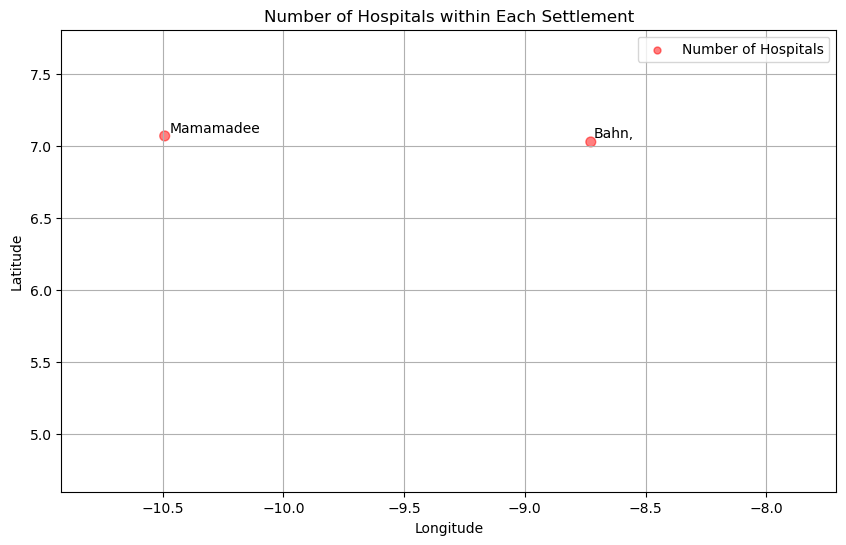

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data
locations = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/geocoded_locations.shp')
hospitals = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/Hospitals/Hospitals.shp')

# Spatial join to find hospitals within settlements
hospitals_within_settlements = gpd.sjoin(hospitals, locations, op='within')

# Count the number of hospitals within each location
hospitals_count_per_location = hospitals_within_settlements.groupby('index_right').size().rename('num_hospitals_within_location')

# Merge the counts back to the locations GeoDataFrame using a left join
locations_with_hospitals_counts = locations.merge(hospitals_count_per_location, left_index=True, right_index=True, how='left')


# Fill NaN values in the hospital count column with 0 (for settlements without hospitals)
locations_with_hospitals_counts['num_hospitals_within_location'] = locations_with_hospitals_counts['num_hospitals_within_location'].fillna(0)

# Convert the geometries to Point geometries
locations_with_hospitals_counts['geometry'] = locations_with_hospitals_counts['geometry'].centroid

plt.figure(figsize=(10, 6))
plt.scatter(locations_with_hospitals_counts['Settlement'], locations_with_hospitals_counts['num_hospitals_within_location'], color='red', alpha=0.5)
plt.title('Number of Hospitals within Each Location')
plt.xlabel('Location Display Name')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
# Visualize the number of hospitals within each settlement as a dot map
plt.figure(figsize=(10, 6))
plt.scatter(locations_with_hospitals_counts['geometry'].x, locations_with_hospitals_counts['geometry'].y, 
            s=locations_with_hospitals_counts['num_hospitals_within_location']*50, color='red', alpha=0.5, label='Number of Hospitals')

# Annotate hospitals with their names
for idx, row in hospitals_within_settlements.iterrows():
    plt.annotate(row['Settlement'], xy=(row['geometry'].x, row['geometry'].y), xytext=(3, 3), textcoords='offset points')

plt.title('Number of Hospitals within Each Settlement')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()